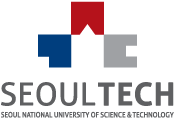

# Lab Session \# 06


---


by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>

## Objective


The objective of this worksheet is to introduce the student to different type of regression and classification techinques. It contains some examples and information about useful libraries that can be used to generate models with linel and non-linear models.


## Importing libraries


The libraries we'll import to start with are pandas and numpy for data handling, and matplotlib, seaborn, and plotly for display generation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Donwnload the files that we will use

In [2]:
!mkdir data

In [3]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=1Bx9twCUUJi-hNScp2J7XPAulUhjcel8t', # Advertising_data  https://drive.google.com/file/d/1Bx9twCUUJi-hNScp2J7XPAulUhjcel8t/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1RHeY6rvMeayzjYzACqpjPYzC7F3sKCDA', # Wage_data https://drive.google.com/file/d/1RHeY6rvMeayzjYzACqpjPYzC7F3sKCDA/view?usp=sharing
        ]
outputs = ['Advertising.csv', 'Wage.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1Bx9twCUUJi-hNScp2J7XPAulUhjcel8t
To: /content/data/Advertising.csv
100%|██████████| 4.55k/4.55k [00:00<00:00, 9.91MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1RHeY6rvMeayzjYzACqpjPYzC7F3sKCDA
To: /content/data/Wage.csv
100%|██████████| 438k/438k [00:00<00:00, 76.9MB/s]


# Linear Regression


In [7]:
# usecols=[1,2,3,4]
advertising = pd.read_csv('data/Advertising.csv',usecols=[1,2,3,4])
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Plotting a regression line using seaborn. (We cannot get the values of the estimated coefficients)

<Axes: xlabel='TV', ylabel='sales'>

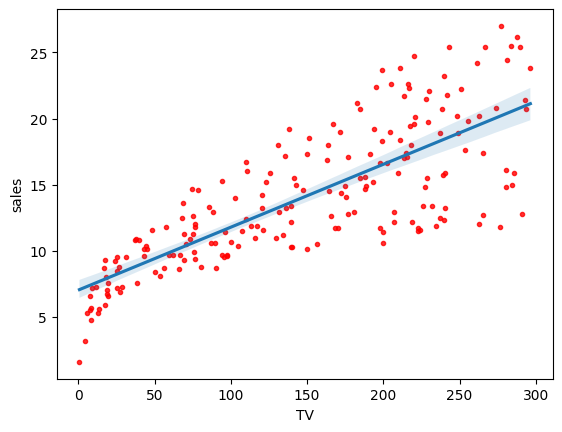

In [11]:
# scatter_kws={'color':'r', 's':9}
sns.regplot(data=advertising, x='TV', y='sales', scatter_kws={'color':'r', 's':9})

Using sklearn for training a linear regression model

In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
lm = LinearRegression(advertising)

In [15]:
# ['TV', 'radio', 'newspaper']
lm.fit(advertising[['TV', 'radio', 'newspaper']], advertising['sales'])

LinearRegression()

In [17]:
print(lm.coef_)
print(lm.intercept_)

[ 0.04576465  0.18853002 -0.00103749]
2.938889369459412


Exercise: Perform the following tasks"

1. Load Wage data
2. Do a quick inspection on Wage data
3. Choose one predictor and plot a regplot against the target variable (make sure to plot the regression line)
4. Train a linear regression model using 'age',	'maritl' and	'race' as predictor variable and 'wage' as response variable.
5. Investigate the coefficients and intercept of your model.

In [33]:
Wage = pd.read_csv('data/Wage.csv')
Wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [34]:
print(Wage.head())        # 상위 5개 데이터 확인
print(Wage.info())        # 데이터 타입 및 결측값 확인
print(Wage.describe())

   year  age            maritl      race        education              region  \
0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   

         jobclass          health health_ins   logwage        wage  
0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
4  2. Information       1. <=Good     1. Yes  4.318063   75.043154  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 co

<Axes: xlabel='age', ylabel='wage'>

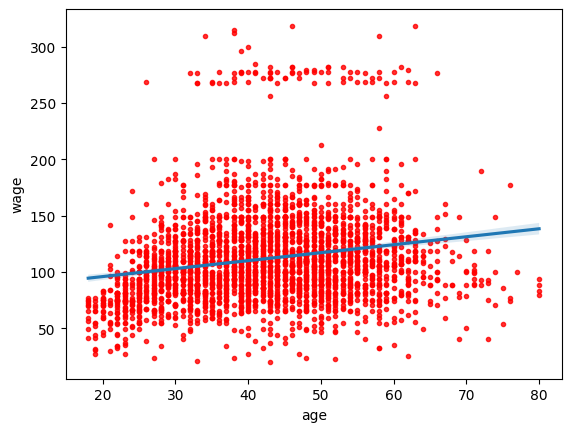

In [38]:
sns.regplot(data=Wage, x='age', y='wage', scatter_kws={'color':'r', 's':9})

In [30]:
lm.fit(W[['TV', 'radio', 'newspaper']], advertising['sales'])

TypeError: LinearRegression.__init__() takes 1 positional argument but 2 were given

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
ord_enc1 = OrdinalEncoder()
ord_enc2 = OrdinalEncoder()

In [43]:
Wage['ord_maritl']= ord_enc1.fit_transform(Wage[['maritl']])
Wage['ord_race']= ord_enc2.fit_transform(Wage[['race']])

In [44]:
lm.fit(Wage[['age', 'ord_maritl', 'ord_race']], Wage[['wage']])

LinearRegression()

In [48]:
print(lm.coef_)
print(lm.intercept_)

[[ 0.69988925  0.26153687 -1.52591816]]
[82.16015742]


## Logistic Regression

Donwnload the files that we will use

In [49]:
urls = ['https://drive.google.com/uc?export=download&id=1LE4HPyxDcx3-QB-tTPUft8RTlzgybn7k', # Default data  https://drive.google.com/file/d/1LE4HPyxDcx3-QB-tTPUft8RTlzgybn7k/view?usp=sharing
        ]
outputs = ['Default.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1LE4HPyxDcx3-QB-tTPUft8RTlzgybn7k
To: /content/data/Default.csv
100%|██████████| 444k/444k [00:00<00:00, 108MB/s]


# Default data


In [51]:
default = pd.read_csv('data/Default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [55]:
from sklearn.preprocessing import LabelEncoder

In [59]:
default

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


In [56]:
labl_ec1 =LabelEncoder()
labl_ec2 =LabelEncoder()


In [57]:
default['default2'] =labl_ec1.fit_transform(default['default'])
default['student2'] =labl_ec1.fit_transform(default['student'])

Let's try linear regression (with a plot)

<Axes: xlabel='balance', ylabel='default2'>

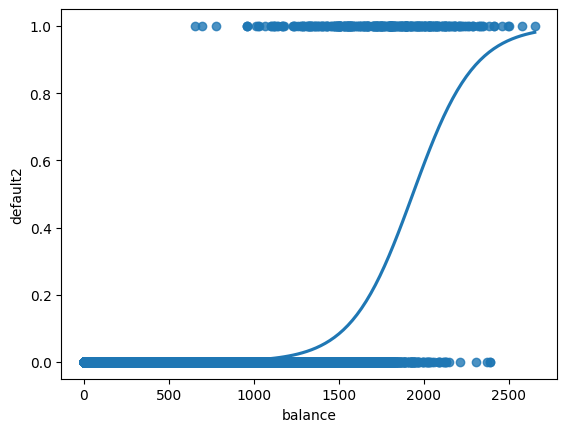

In [61]:
# scatter_kws={'color':'blue', 's':9}
sns.regplot(data=default, x='balance', y='default2', logistic = True, ci = None)

# Logistic Regression

In [ ]:
# line_kws={'color':'blue', 'lw':2}


In [68]:
from sklearn.linear_model import LogisticRegression

In [71]:
clf = LogisticRegression(penalty=None)
X_train = default[['balance']]
y= default['default2']
clf.fit(X_train, y)
print(clf)
print("classes", clf.classes_)
print('coefficients', clf.coef_)
print('intercept', clf.intercept_)

LogisticRegression(penalty=None)
classes [0 1]
coefficients [[0.00549892]]
intercept [-10.65132867]


## Decision boundaries

In [73]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
X_train = default[['balance', 'income']].values
y_train = default['default2']

In [74]:
fig = plt.figure(figsize=(6,4))
scatter_kwargs = {'s': 20, 'edgecolor': None, 'alpha': 0.8}


<Figure size 600x400 with 0 Axes>

# *k*-NN *Classifier*

In [ ]:
X, y = make_classification(n_samples=300,n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=714)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y, style=y,alpha=0.6)

In [ ]:
%%time
K=[3,10,25,50]
fig,axes = plt.subplots(ncols=len(K),figsize=(6*len(K),4))
for i, k in enumerate(K):
  # create a KNN classifier
  clf =

  plot_decision_regions(X=X, y=y, clf=clf, ax=axes[i])
  axes[i].set_title(f'{k}-NN classification')

## Decision Trees


In [75]:
sns.set_style("darkgrid")

Donwnload the files that we will use

In [76]:
urls = ['https://drive.google.com/uc?export=download&id=1G5dtIOtywpDBgREbsf7iDVExz6LVg4DM', # heart  https://drive.google.com/file/d/1G5dtIOtywpDBgREbsf7iDVExz6LVg4DM/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1ULDuvWPWD3LmxpQ6FKUHe1prjdM8LmSY' # hitters https://drive.google.com/file/d/1ULDuvWPWD3LmxpQ6FKUHe1prjdM8LmSY/view?usp=sharing
        ]
outputs = ['heart.csv','hitters.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1G5dtIOtywpDBgREbsf7iDVExz6LVg4DM
To: /content/data/heart.csv
100%|██████████| 19.9k/19.9k [00:00<00:00, 32.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1ULDuvWPWD3LmxpQ6FKUHe1prjdM8LmSY
To: /content/data/hitters.csv
100%|██████████| 22.9k/22.9k [00:00<00:00, 34.7MB/s]


In [77]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

## Decision tree for regression

In [82]:
hit = pd.read_csv('data/hitters.csv')
hit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [83]:
hit.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [85]:
hit.dropna(inplace=True)

In [91]:
X= hit[['Years','Hits']]
y = hit['Salary']

In [92]:
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(X,y)


DecisionTreeRegressor(max_depth=2)

In [93]:
heart = pd.read_csv('data/heart.csv')
heart.dropna(inplace=True)
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   Age         297 non-null    int64  
 2   Sex         297 non-null    int64  
 3   ChestPain   297 non-null    object 
 4   RestBP      297 non-null    int64  
 5   Chol        297 non-null    int64  
 6   Fbs         297 non-null    int64  
 7   RestECG     297 non-null    int64  
 8   MaxHR       297 non-null    int64  
 9   ExAng       297 non-null    int64  
 10  Oldpeak     297 non-null    float64
 11  Slope       297 non-null    int64  
 12  Ca          297 non-null    float64
 13  Thal        297 non-null    object 
 14  AHD         297 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB


## Decision tree for classification

In [ ]:
X = pd.

In [ ]:
plot_decision_regions(X[['MaxHR','Age']].values, y, clf=clf2, legend=True)